# Intrusion Detection Computer Vision System

## 1. Video Analysis

### 1.1. Video Characteristics
- 12 fps
- ~41s
- 320x240 pixels
- 8 bit/pixel (256 gray levels)

TODO: Considerations?

### 1.2. Key "Sections"
- Luminosity changes -> updating bg / tuning threshold
- Speed changes -> alpha rate tuning

TODO: Stampare i frame già qui? Salvare i frame_index importanti per riusarli dopo per stampare altre cose?

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Only for jupyter notebook visualization
%matplotlib inline 

from intrusiondetection.parameters import ParameterList
from intrusiondetection.utility import distance_euclidean
from intrusiondetection.model import MorphOp, MorphOpsSet, Video, Background

In [2]:
param_bag = ParameterList({
    "input_video": "rilevamento-intrusioni-video.avi",
    "output_directory": "output",
    "threshold": [37],
    "distance": [distance_euclidean],
    "morph_ops": [
        MorphOpsSet(MorphOp(cv2.MORPH_OPEN, (3,3)), MorphOp(cv2.MORPH_CLOSE, (5,5), iterations=3), MorphOp(cv2.MORPH_CLOSE, (40,3)))#MorphOp(cv2.MORPH_CLOSE, (10,3), iterations=3))
    ],
    "background_threshold": [37],
    "background_distance": [distance_euclidean],
    "background_morph_ops": [
        MorphOpsSet(MorphOp(cv2.MORPH_CLOSE, (3,3), iterations=1),MorphOp(cv2.MORPH_OPEN, (3,3), iterations=2), MorphOp(cv2.MORPH_DILATE, (25,10)), MorphOp(cv2.MORPH_ERODE, (15,5)))
    ],
    "alpha": [0.1],
    "background": {
        "frames": [100],
        "interpolation": [np.median]
    }
})

for params in param_bag:
    pass


video = Video("rilevamento-intrusioni-video.avi")

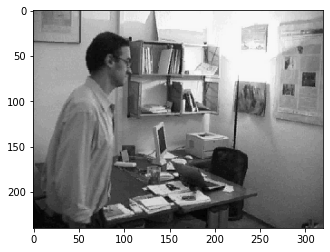

In [3]:
video.frames[100].show('image')

## 2. Background Estimation

### 2.1. Initial Background
- Tuning interpolation function / frames number

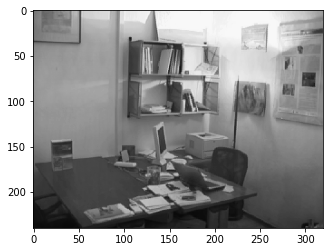

In [4]:
background = Background("rilevamento-intrusioni-video.avi", np.mean, 100)
background.show('image')

### 2.2. Background update
- Blind
- Selective

In [ ]:
#TODO Mostrare il background blind / selective in alcuni punti chiave per fare vedere le differenze?

## 3. Change Detection

### 3.1. Background subtraction
- Distance and threshold tuning

In [ ]:
#TODO: Stampare subtraction con vari threshold e distance functions

### 3.2. Binary Morphology

In [ ]:
#TODO: Mostrare selection binarizzata e applicare le operazioni morfologiche una per una per sottolineare i cambiamenti

## 4. Blob Analysis

### 4.1. Blob Labeling

In [ ]:
#TODO: Stampare le immagini con i blob classificati

### 4.2. Blob "linkage"
- Similarity tuning (mean value)

In [ ]:
# Mostrare frame importanti con similarity stampata?

### 4.3. Selected Features

### 4.4. Classification 
- Score thresholding (mean value)

In [ ]:
# Mostrare frame importanti con valore stampato?

## 5. True/False Object Recognition

- "Sobel"
- Tuning

In [ ]:
# Mostrare frame importanti con edge strength stampata?

## 6. Output Generation

- Graphical
- Textual

In [ ]:
#TODO Esempio di classificazione finita (con contours disegnati)